In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [20]:
# importo el nuevo dataset
movies_dataset_completo= pd.read_csv("movies_dataset_completo.csv")

In [21]:
#veamos como está compuesto
movies_dataset_completo.head(5)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,Idioma,release_year,release_month,Mes,release_day,Día,Día_Español,return,Reparto,Director
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,...,English,1995.0,10.0,Octubre,30.0,Monday,Lunes,12.451801,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter
1,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,...,English,1995.0,12.0,Diciembre,15.0,Friday,Viernes,4.043035,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Larry J. Franco
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,English,1995.0,12.0,Diciembre,22.0,Friday,Viernes,0.000000,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",Howard Deutch
3,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,...,English,1995.0,12.0,Diciembre,22.0,Friday,Viernes,5.090760,"Whitney Houston, Angela Bassett, Loretta Devin...",Forest Whitaker
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,...,English,1995.0,2.0,Febrero,10.0,Friday,Viernes,0.000000,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Alan Silvestri


In [22]:
# columnas que nos encontramos
movies_dataset_completo.columns

Index(['belongs_to_collection', 'budget', 'genres', 'id', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'Franquicia', 'Productora', 'Género', 'País', 'Idioma',
       'release_year', 'release_month', 'Mes', 'release_day', 'Día',
       'Día_Español', 'return', 'Reparto', 'Director'],
      dtype='object')

In [23]:
#tamaño
movies_dataset_completo.shape

(45539, 32)

In [24]:
# miremos algunas variables descriptivas
movies_dataset_completo.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,release_month,release_day,return
count,4.545200e+04,45539.000000,45452.000000,4.545200e+04,45206.000000,45452.000000,45452.000000,45452.000000,45452.000000,45452.000000,4.545200e+04
mean,4.231201e+06,108323.394058,2.926828,1.121905e+07,94.179821,5.623962,109.987283,1991.882579,6.458704,14.214006,6.589397e+02
std,1.742923e+07,112410.791486,6.006405,6.433916e+07,38.331639,1.915585,491.347202,24.057750,3.628430,9.284828,7.463082e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,1.000000,1.000000,0.000000e+00
25%,0.000000e+00,26415.000000,0.389040,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,3.000000,6.000000,0.000000e+00
50%,0.000000e+00,60014.000000,1.131324,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,7.000000,14.000000,0.000000e+00
75%,0.000000e+00,157176.000000,3.694242,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,10.000000,22.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,12.000000,31.000000,1.239638e+07


<Axes: >

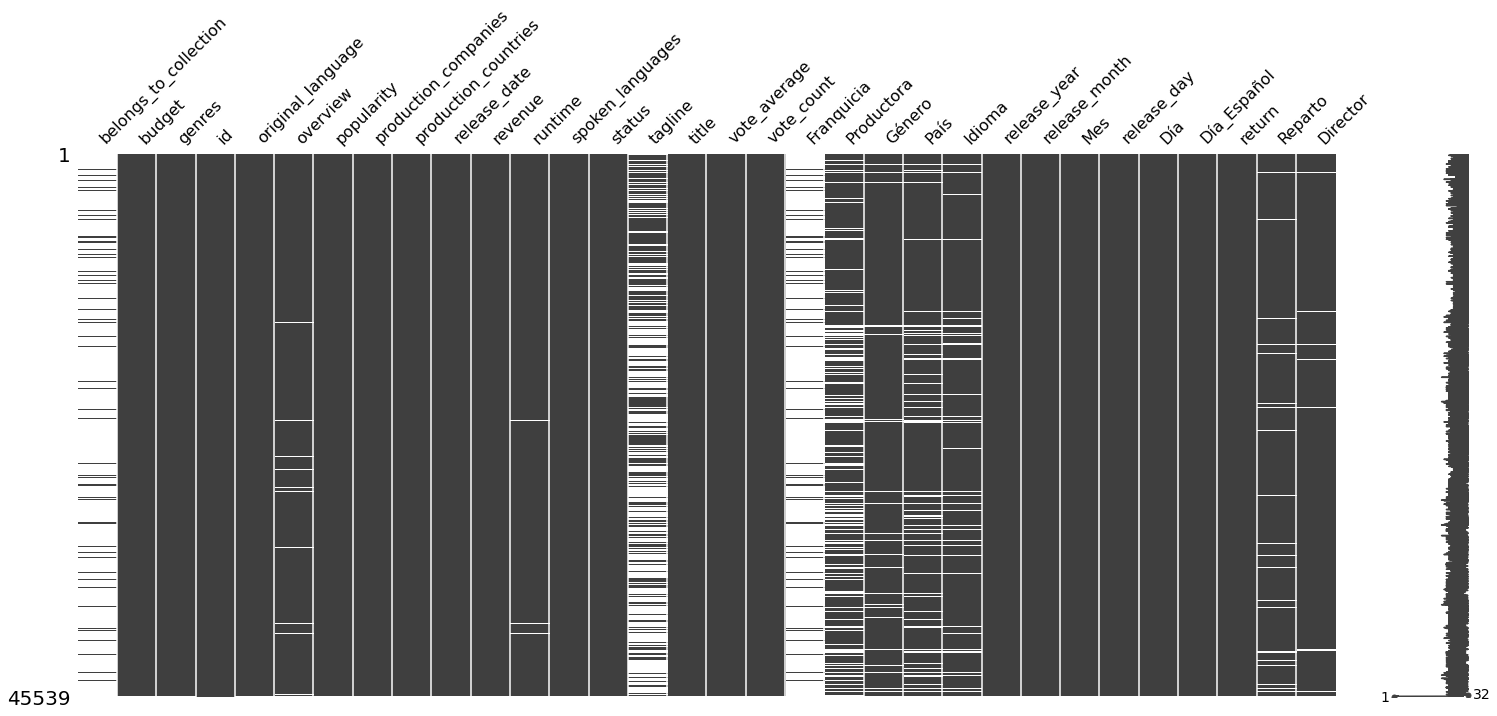

In [25]:
# visualicemos valores faltantes
msno.matrix(movies_dataset_completo)

<Axes: >

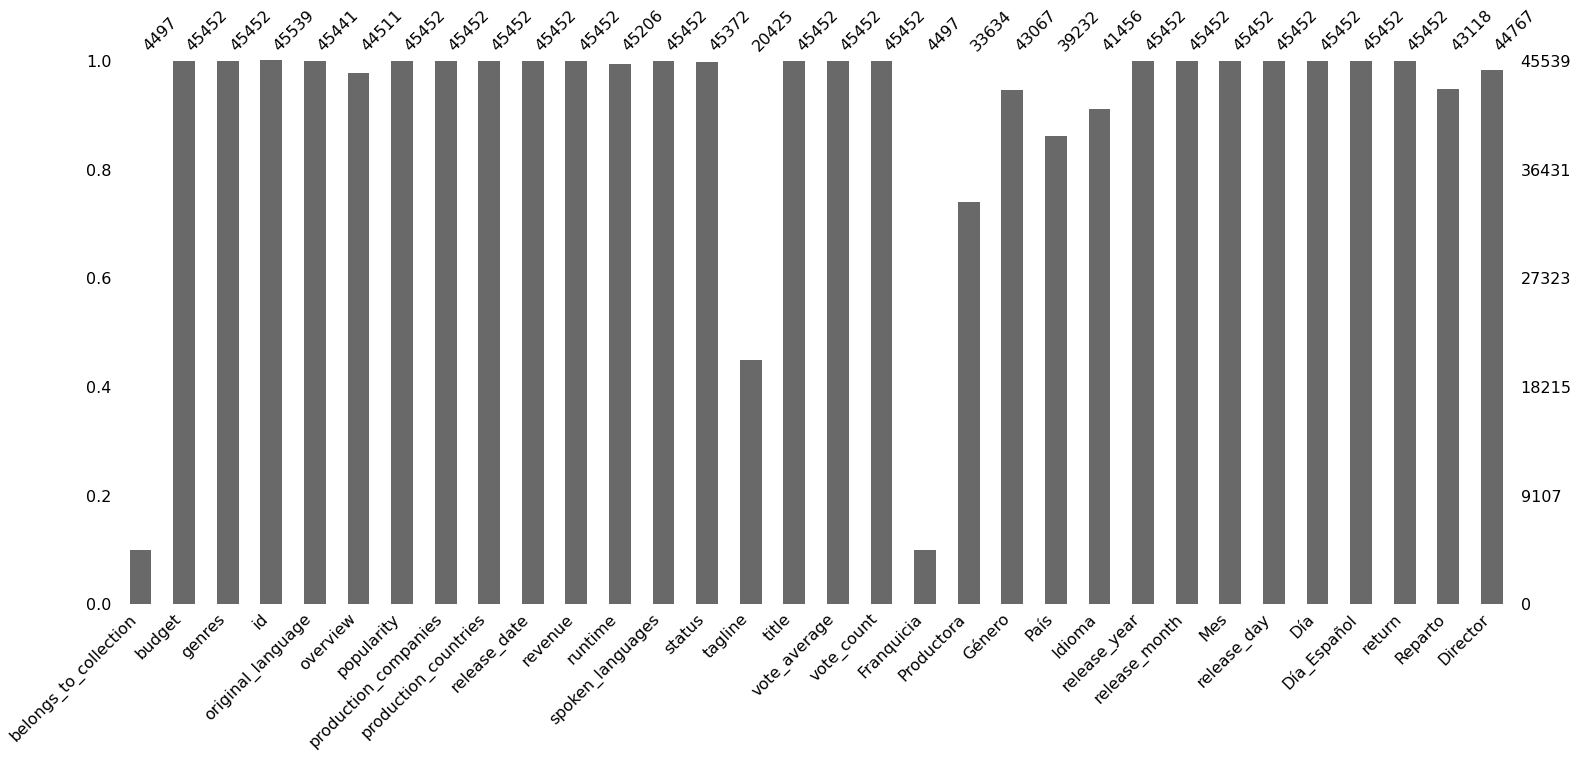

In [26]:
# otra manera de verlo, y pues las columnas con faltantes no son tan relevantes para este análisis
msno.bar(movies_dataset_completo)

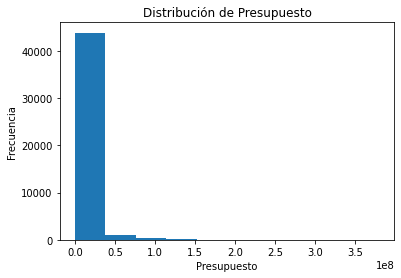

In [27]:
# miremos un  histograma del presupuesto
plt.hist(movies_dataset_completo['budget'], bins=10)
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.title('Distribución de Presupuesto')
plt.show()

# la mayoría de películas tienen presupuestos de hasta 40 millones de dolares

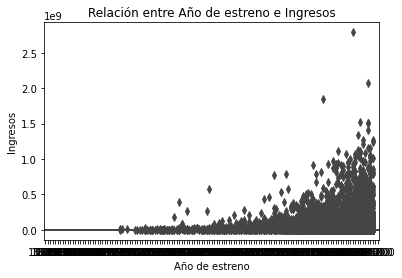

In [28]:
# hagamos un gráfico de cajas

sns.boxplot(x='release_year', y='revenue', data=movies_dataset_completo)
plt.xlabel('Año de estreno')
plt.ylabel('Ingresos')
plt.title('Relación entre Año de estreno e Ingresos')
plt.show()

# entre mas 

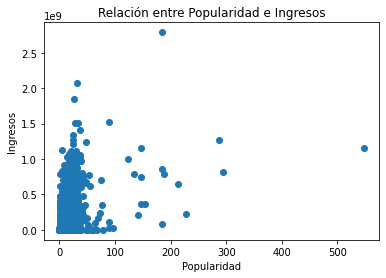

In [29]:
# gráfico de dispersión de votos y popularidad
# Gráfico de dispersión

plt.scatter(movies_dataset_completo['popularity'], movies_dataset_completo['revenue'])
plt.xlabel('Popularidad')
plt.ylabel('Ingresos')
plt.title('Relación entre Popularidad e Ingresos')
plt.show()
# no nos dice mucho este gráfico

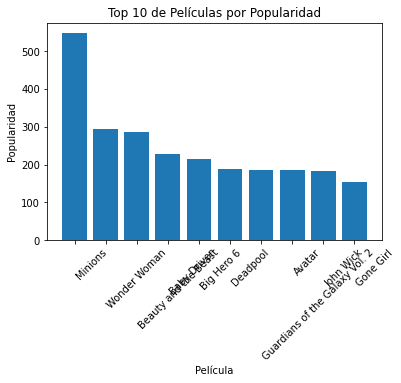

In [30]:
# hagamos un Top 10 de popularidad de películas
# 10 registros con mayor popularidad
top_10_popularidad = movies_dataset_completo.nlargest(10, 'popularity')

# Obtener los títulos y los valores de popularidad
titulos = top_10_popularidad['title']
popularidad = top_10_popularidad['popularity']

plt.bar(titulos, popularidad)

plt.title('Top 10 de Películas por Popularidad')
plt.xlabel('Película')
plt.ylabel('Popularidad')

# Ajustar el espaciado entre las etiquetas del eje x
plt.xticks(rotation=45, ha='left')

# Mostrar el gráfico
plt.show()


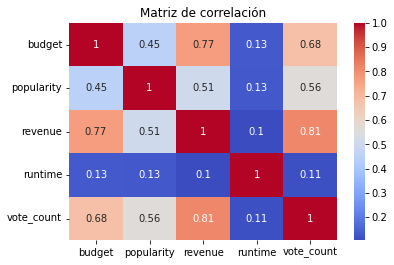

In [31]:
# matriz de correlación
matriz_correlacion = movies_dataset_completo[['budget', 'popularity', 'revenue', 'runtime', 'vote_count']].corr()
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [32]:
#%pip install wordcloud

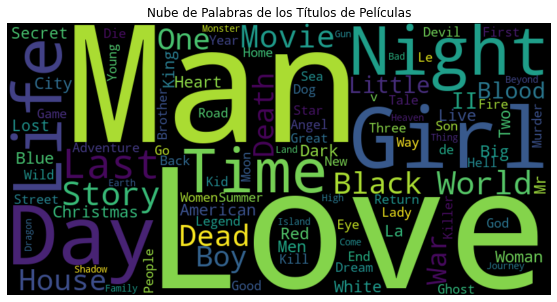

In [33]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
movies_dataset_completo['title'] = movies_dataset_completo['title'].astype(str)

# Obtener los datos para generar la nube de palabras 
datos = movies_dataset_completo['title']

# Unir todos los títulos en un solo texto
texto = ' '.join(datos)

# Crear el objeto de WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black').generate(texto)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de los Títulos de Películas')
plt.show()

In [34]:
# voy a optar por hacer una similitud de cosenos así que dejaré las columnas numéricas que considero más relevantes
columnas_a_eliminar = ['genres', 'id', 'runtime', 'belongs_to_collection', 'overview', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'tagline','original_language','status','Franquicia','Productora', "Género", 'País','Idioma', 'Mes','Día', 'Día_Español', 'Reparto', 'Director']
movies_dataset_recomendación = movies_dataset_completo.drop(columnas_a_eliminar, axis=1)

In [36]:
movies_dataset_recomendación = movies_dataset_recomendación.fillna(0)

In [37]:
movies_dataset_recomendación.to_csv('movies_dataset_recomendación.csv',index=False)

In [38]:
movies_dataset_recomendación.head()

,budget,popularity,revenue,title,vote_average,vote_count,release_year,release_month,release_day,return
0,30000000.0,21.946943,373554033.0,Toy Story,7.7,5415.0,1995.0,10.0,30.0,12.451801
1,65000000.0,17.015539,262797249.0,Jumanji,6.9,2413.0,1995.0,12.0,15.0,4.043035
2,0.0,11.712900,0.0,Grumpier Old Men,6.5,92.0,1995.0,12.0,22.0,0.000000
3,16000000.0,3.859495,81452156.0,Waiting to Exhale,6.1,34.0,1995.0,12.0,22.0,5.090760
4,0.0,8.387519,76578911.0,Father of the Bride Part II,5.7,173.0,1995.0,2.0,10.0,0.000000
